In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
data = pd.read_csv('Data/Assignment_Data.csv')

In [9]:
data.head(15)

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG
0,2745,180976,2021-02-13 03:08:24.000,2021-02-13 03:38:26.000,0,NaN,2021-02-13 03:01:11.686,2021-02-13 03:43:26.000,320.9,320.0,314.0,1810.0,63,2021-02-13 03:07:34.000,373.0,37.377569,72.832560
1,9462,280243,2021-02-14 05:06:40.000,2021-02-14 05:31:04.000,0,NaN,2021-02-14 04:54:25.832,2021-02-14 05:36:04.000,516.8,342.5,451.0,3210.0,27,2021-02-14 05:06:40.000,373.0,37.380613,72.796909
2,14071,339813,2021-02-15 02:22:40.000,2021-02-15 02:44:02.000,0,NaN,2021-02-15 02:01:17.864,2021-02-15 02:49:02.000,459.5,418.7,443.0,2910.0,57,2021-02-15 02:22:35.000,373.0,37.372032,72.805871
3,14442,1315348,2021-02-15 03:01:25.000,2021-02-15 03:15:02.000,0,NaN,2021-02-15 02:43:41.129,2021-02-15 03:20:02.000,376.4,332.9,367.3,3210.0,41,2021-02-15 03:00:28.000,373.0,37.371380,72.819992
4,14515,1186729,2021-02-15 03:12:24.000,2021-02-15 03:50:24.000,0,NaN,2021-02-15 02:48:17.074,2021-02-15 03:55:24.000,414.5,334.1,413.2,3210.0,13,2021-02-15 03:12:09.000,373.0,37.369925,72.826764
5,14974,180976,2021-02-15 03:36:24.000,2021-02-15 03:54:31.000,0,NaN,2021-02-15 03:30:24.093,2021-02-15 03:59:31.000,370.4,414.5,378.2,3710.0,52,2021-02-15 03:36:19.000,373.0,37.368782,72.809458
6,15207,946929,2021-02-15 04:32:24.000,2021-02-15 04:47:49.000,0,NaN,2021-02-15 03:46:39.529,2021-02-15 04:52:49.000,410.3,320.0,376.8,3160.0,69,2021-02-15 04:32:07.000,373.0,37.386779,72.806458
7,17364,1182596,2021-02-15 18:50:40.000,2021-02-15 19:11:16.000,0,NaN,2021-02-15 18:48:57.460,2021-02-15 19:16:16.000,399.8,389.3,382.8,2410.0,9,2021-02-15 18:50:09.000,373.0,37.370959,72.834112
8,20180,977070,2021-02-16 03:07:54.000,2021-02-16 03:28:29.000,0,NaN,2021-02-16 03:05:04.748,2021-02-16 03:33:29.000,365.0,347.0,386.2,2660.0,7,2021-02-16 03:07:53.000,373.0,37.368161,72.794676
9,20240,977070,2021-02-16 03:28:40.000,2021-02-16 03:43:28.000,0,NaN,2021-02-16 03:10:33.130,2021-02-16 03:48:28.000,392.6,473.9,385.5,3460.0,5,2021-02-16 03:28:16.000,373.0,37.365348,72.830327


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ORDER_ID                  11935 non-null  int64  
 1   DE_ID                     11935 non-null  int64  
 2   ASSIGNMENT_START_TIME     11935 non-null  object 
 3   ASSIGNMENT_END_TIME       11935 non-null  object 
 4   reject_ind                11935 non-null  int64  
 5   reject_type               629 non-null    object 
 6   PLACED_TIME               11935 non-null  object 
 7   DELIVERED_TIME            11890 non-null  object 
 8   LASTMILE_DISTANCE         11931 non-null  float64
 9   FIRSTMILE_DISTANCE        11920 non-null  float64
 10  LAST_MILE_TIME_PREDICTED  11935 non-null  float64
 11  PAYOUT_MADE_TO_DE         11934 non-null  float64
 12  NUM_PING_COUNT_LAST10MIN  11935 non-null  int64  
 13  LAST_PING_TIME_LAST10MIN  11935 non-null  object 
 14  CUSTOM

Text(0, 0.5, 'Canceled vs Not Canceled')

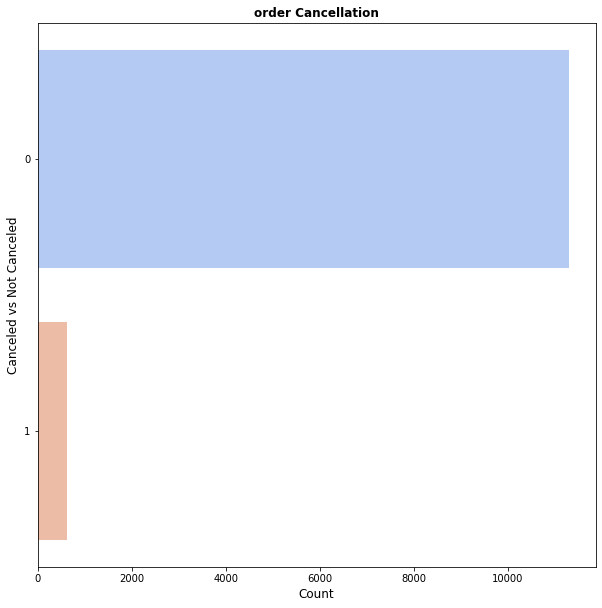

In [11]:
# Display booking cancellation 
plt.figure(figsize=(10,10))
sns.countplot(y='reject_ind', data= data, palette='coolwarm', orient = 'v')
plt.title('order Cancellation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled vs Not Canceled', fontsize=12)

Type-1    276
Type-2    192
Type-3     94
Type-4     67
Name: reject_type, dtype: int64


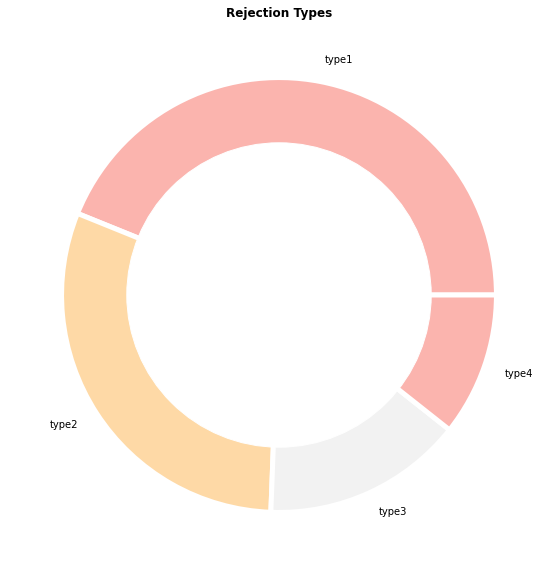

In [12]:
# Visualizing `meal` column data
mealLabels= ['type1','type2', 'type3', 'type4']
size = data['reject_type'].value_counts()
print(size)
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(3)*4)
myCircle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=mealLabels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(myCircle)
plt.title('Rejection Types', weight='bold')
plt.show()

In [13]:
data_driver = pd.read_csv('Data/Delivery_Partners_Data.csv')

In [14]:
data_driver

,DE_ID,SHIFT_END_TIME,DE_HOME_LAT,DE_HOME_LNG,DE_JOINING_DATE,DE_ZONE_ID
0,141533,06:42,37.390427,72.849424,2019-09-20,372
1,235942,08:42,37.372289,72.885341,2020-03-15,372
2,973234,06:42,37.410268,72.853610,2018-12-21,375
3,973473,05:42,37.397067,72.872533,2018-12-21,624
4,1016546,06:42,37.425545,72.895137,2019-01-11,668
...,...,...,...,...,...,...
986,362691,05:42,37.374788,72.861131,2020-08-14,372
987,369684,06:42,37.365671,72.861327,2020-08-21,374
988,395572,06:42,37.399884,72.874896,2020-09-15,624
989,1180245,01:42,37.380950,72.865009,2019-04-01,372


In [15]:
data_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DE_ID            991 non-null    int64  
 1   SHIFT_END_TIME   991 non-null    object 
 2   DE_HOME_LAT      991 non-null    float64
 3   DE_HOME_LNG      991 non-null    float64
 4   DE_JOINING_DATE  991 non-null    object 
 5   DE_ZONE_ID       991 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 46.6+ KB


Text(0, 0.5, 'Shift end time')

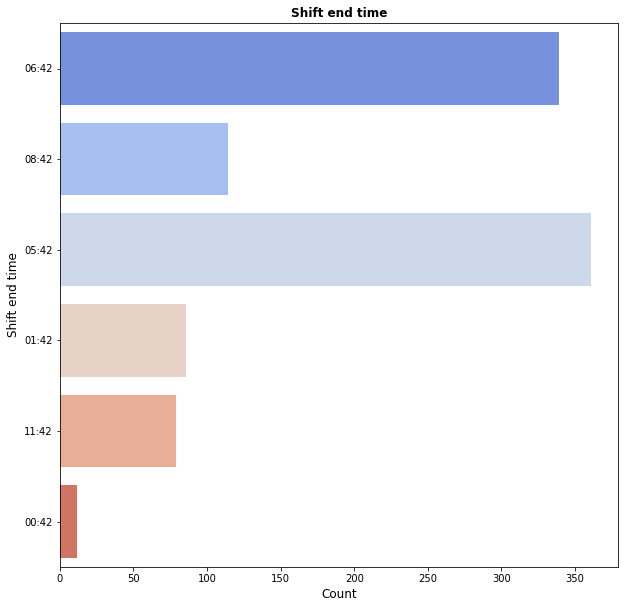

In [16]:
# Display booking cancellation 
plt.figure(figsize=(10,10))
sns.countplot(y='SHIFT_END_TIME', data= data_driver, palette='coolwarm', orient = 'v')
plt.title('Shift end time', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Shift end time', fontsize=12)

Text(0, 0.5, 'Driver Zone')

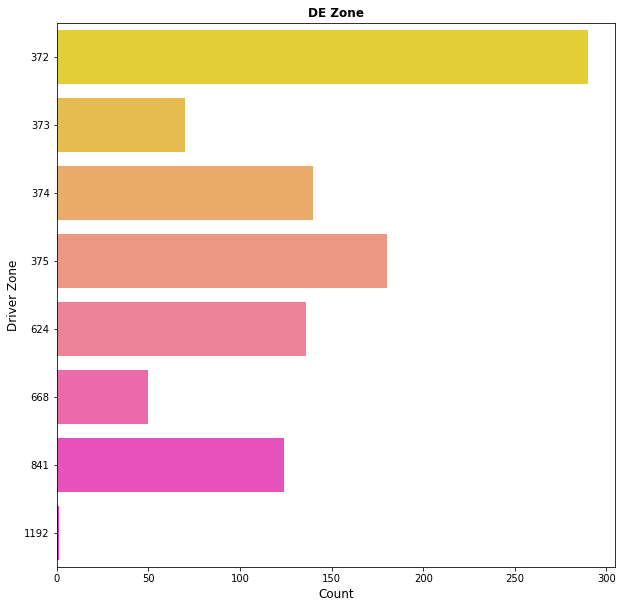

In [17]:
# Display booking cancellation 
plt.figure(figsize=(10,10))
sns.countplot(y='DE_ZONE_ID', data= data_driver, palette='spring_r', orient = 'v')
plt.title('DE Zone', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Driver Zone', fontsize=12)

In [18]:
new_data = data.merge(data_driver,on='DE_ID')

In [19]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11935 entries, 0 to 11934
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ORDER_ID                  11935 non-null  int64  
 1   DE_ID                     11935 non-null  int64  
 2   ASSIGNMENT_START_TIME     11935 non-null  object 
 3   ASSIGNMENT_END_TIME       11935 non-null  object 
 4   reject_ind                11935 non-null  int64  
 5   reject_type               629 non-null    object 
 6   PLACED_TIME               11935 non-null  object 
 7   DELIVERED_TIME            11890 non-null  object 
 8   LASTMILE_DISTANCE         11931 non-null  float64
 9   FIRSTMILE_DISTANCE        11920 non-null  float64
 10  LAST_MILE_TIME_PREDICTED  11935 non-null  float64
 11  PAYOUT_MADE_TO_DE         11934 non-null  float64
 12  NUM_PING_COUNT_LAST10MIN  11935 non-null  int64  
 13  LAST_PING_TIME_LAST10MIN  11935 non-null  object 
 14  CUSTOM

In [20]:
new_data = new_data.drop('DE_JOINING_DATE', 1)

/tmp/ipykernel_767687/2942233801.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop('DE_JOINING_DATE', 1)


In [21]:
new_data['ASSIGNMENT_YEAR'] = pd.DatetimeIndex(new_data['ASSIGNMENT_START_TIME']).year

In [22]:
new_data['ASSIGNMENT_MONTH'] = pd.DatetimeIndex(new_data['ASSIGNMENT_START_TIME']).month

In [23]:
new_data['ASSIGNMENT_DAY'] = pd.DatetimeIndex(new_data['ASSIGNMENT_START_TIME']).day

In [24]:
new_data['ASSIGNMENT_START'] = pd.DatetimeIndex(new_data['ASSIGNMENT_START_TIME']).time

In [25]:
new_data['ASSIGNMENT_END'] = pd.DatetimeIndex(new_data['ASSIGNMENT_END_TIME']).time

In [26]:
new_data['ORDER_PLACED_TIME'] = pd.DatetimeIndex(new_data['PLACED_TIME']).time

In [27]:
new_data['ORDER_DELIVERED_TIME'] = pd.DatetimeIndex(new_data['DELIVERED_TIME']).time

In [28]:
new_data = new_data.drop(['ASSIGNMENT_START_TIME', 'ASSIGNMENT_END_TIME','PLACED_TIME', 'DELIVERED_TIME', 'ASSIGNMENT_YEAR'],  1)

/tmp/ipykernel_767687/2050375337.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop(['ASSIGNMENT_START_TIME', 'ASSIGNMENT_END_TIME','PLACED_TIME', 'DELIVERED_TIME', 'ASSIGNMENT_YEAR'],  1)


In [29]:
new_data

,ORDER_ID,DE_ID,reject_ind,reject_type,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,...,SHIFT_END_TIME,DE_HOME_LAT,DE_HOME_LNG,DE_ZONE_ID,ASSIGNMENT_MONTH,ASSIGNMENT_DAY,ASSIGNMENT_START,ASSIGNMENT_END,ORDER_PLACED_TIME,ORDER_DELIVERED_TIME
0,2745,180976,0,NaN,320.9,320.0,314.0,1810.0,63,2021-02-13 03:07:34.000,...,05:42,37.374634,72.871986,373,2,13,03:08:24,03:38:26,03:01:11.686000,03:43:26
1,14974,180976,0,NaN,370.4,414.5,378.2,3710.0,52,2021-02-15 03:36:19.000,...,05:42,37.374634,72.871986,373,2,15,03:36:24,03:54:31,03:30:24.093000,03:59:31
2,115325,180976,0,NaN,408.2,320.0,397.2,2760.0,9,2021-03-04 04:56:33.000,...,05:42,37.374634,72.871986,373,3,4,04:57:21,05:23:19,04:47:34.977000,05:28:19
3,1648,180976,0,NaN,389.6,342.8,382.5,2210.0,16,2021-02-13 00:12:27.000,...,05:42,37.374634,72.871986,373,2,13,00:12:40,01:02:36,00:11:09.582000,01:07:36
4,72496,180976,0,NaN,392.3,418.1,351.3,2460.0,13,2021-02-25 04:07:58.000,...,05:42,37.374634,72.871986,373,2,25,04:08:34,04:30:31,03:56:48.521000,04:35:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,81846,1201906,0,NaN,401.9,387.5,372.8,2460.0,53,2021-02-26 05:57:08.000,...,08:42,37.380234,72.913054,372,2,26,05:57:46,06:36:05,05:51:48.846000,06:41:05
11931,81393,1201906,0,NaN,480.5,351.2,430.7,2660.0,26,2021-02-26 05:37:53.000,...,08:42,37.380234,72.913054,372,2,26,05:38:33,05:57:36,05:11:24.691000,06:02:36
11932,90060,281239,0,NaN,469.1,362.0,439.0,4010.0,25,2021-02-28 00:55:51.000,...,06:42,37.386745,72.848642,372,2,28,00:56:16,01:29:13,00:46:54.115000,01:34:13
11933,89120,1303082,0,NaN,610.7,344.9,499.5,5460.0,62,2021-02-27 22:32:03.000,...,05:42,37.350734,72.890238,841,2,27,22:32:33,22:55:17,22:32:18.720000,23:00:17


In [30]:
new_data['LAST_PING_MONTH'] = pd.DatetimeIndex(new_data['LAST_PING_TIME_LAST10MIN']).month

In [31]:
new_data['LAST_PING_DAY'] = pd.DatetimeIndex(new_data['LAST_PING_TIME_LAST10MIN']).day

In [32]:
new_data['LAST_PING_TIME'] = pd.DatetimeIndex(new_data['LAST_PING_TIME_LAST10MIN']).time

In [33]:
new_data = new_data.drop('LAST_PING_TIME_LAST10MIN', 1)

/tmp/ipykernel_767687/416671765.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop('LAST_PING_TIME_LAST10MIN', 1)


In [34]:
new_data

,ORDER_ID,DE_ID,reject_ind,reject_type,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,...,DE_ZONE_ID,ASSIGNMENT_MONTH,ASSIGNMENT_DAY,ASSIGNMENT_START,ASSIGNMENT_END,ORDER_PLACED_TIME,ORDER_DELIVERED_TIME,LAST_PING_MONTH,LAST_PING_DAY,LAST_PING_TIME
0,2745,180976,0,NaN,320.9,320.0,314.0,1810.0,63,373.0,...,373,2,13,03:08:24,03:38:26,03:01:11.686000,03:43:26,2,13,03:07:34
1,14974,180976,0,NaN,370.4,414.5,378.2,3710.0,52,373.0,...,373,2,15,03:36:24,03:54:31,03:30:24.093000,03:59:31,2,15,03:36:19
2,115325,180976,0,NaN,408.2,320.0,397.2,2760.0,9,373.0,...,373,3,4,04:57:21,05:23:19,04:47:34.977000,05:28:19,3,4,04:56:33
3,1648,180976,0,NaN,389.6,342.8,382.5,2210.0,16,373.0,...,373,2,13,00:12:40,01:02:36,00:11:09.582000,01:07:36,2,13,00:12:27
4,72496,180976,0,NaN,392.3,418.1,351.3,2460.0,13,373.0,...,373,2,25,04:08:34,04:30:31,03:56:48.521000,04:35:31,2,25,04:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,81846,1201906,0,NaN,401.9,387.5,372.8,2460.0,53,373.0,...,372,2,26,05:57:46,06:36:05,05:51:48.846000,06:41:05,2,26,05:57:08
11931,81393,1201906,0,NaN,480.5,351.2,430.7,2660.0,26,373.0,...,372,2,26,05:38:33,05:57:36,05:11:24.691000,06:02:36,2,26,05:37:53
11932,90060,281239,0,NaN,469.1,362.0,439.0,4010.0,25,373.0,...,372,2,28,00:56:16,01:29:13,00:46:54.115000,01:34:13,2,28,00:55:51
11933,89120,1303082,0,NaN,610.7,344.9,499.5,5460.0,62,373.0,...,841,2,27,22:32:33,22:55:17,22:32:18.720000,23:00:17,2,27,22:32:03


Text(0, 0.5, 'Count')

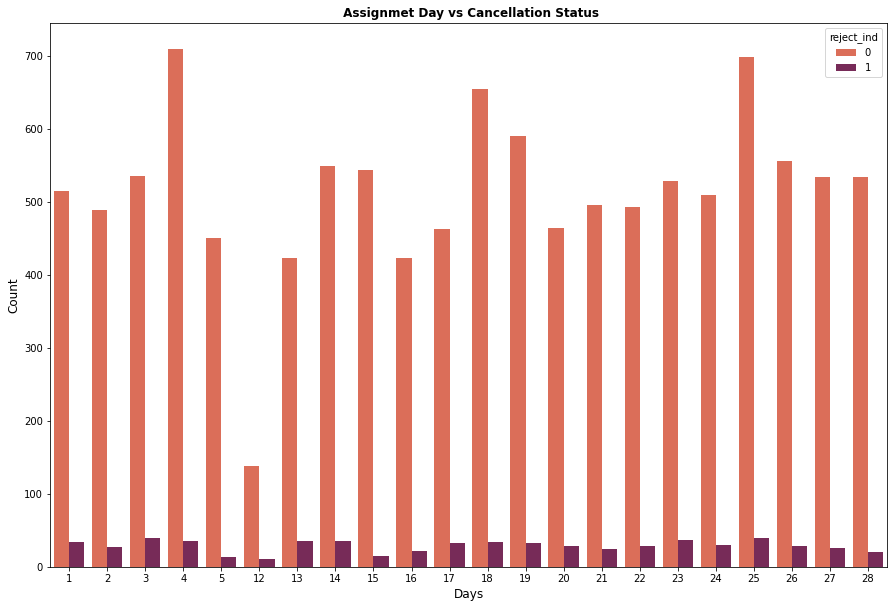

In [35]:
# Display `ADR` vs `Booking Cancellation Status` by month
#hotelData['adr'] = data['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.countplot(x='ASSIGNMENT_DAY', hue='reject_ind', dodge=True, palette= 'rocket_r', data=new_data)
plt.title(' Assignmet Day vs Cancellation Status', weight='bold')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [36]:
new_data = new_data.drop(['LAST_PING_MONTH','LAST_PING_DAY'], 1)

/tmp/ipykernel_767687/429280757.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop(['LAST_PING_MONTH','LAST_PING_DAY'], 1)


In [37]:
new_data

,ORDER_ID,DE_ID,reject_ind,reject_type,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,...,DE_HOME_LAT,DE_HOME_LNG,DE_ZONE_ID,ASSIGNMENT_MONTH,ASSIGNMENT_DAY,ASSIGNMENT_START,ASSIGNMENT_END,ORDER_PLACED_TIME,ORDER_DELIVERED_TIME,LAST_PING_TIME
0,2745,180976,0,NaN,320.9,320.0,314.0,1810.0,63,373.0,...,37.374634,72.871986,373,2,13,03:08:24,03:38:26,03:01:11.686000,03:43:26,03:07:34
1,14974,180976,0,NaN,370.4,414.5,378.2,3710.0,52,373.0,...,37.374634,72.871986,373,2,15,03:36:24,03:54:31,03:30:24.093000,03:59:31,03:36:19
2,115325,180976,0,NaN,408.2,320.0,397.2,2760.0,9,373.0,...,37.374634,72.871986,373,3,4,04:57:21,05:23:19,04:47:34.977000,05:28:19,04:56:33
3,1648,180976,0,NaN,389.6,342.8,382.5,2210.0,16,373.0,...,37.374634,72.871986,373,2,13,00:12:40,01:02:36,00:11:09.582000,01:07:36,00:12:27
4,72496,180976,0,NaN,392.3,418.1,351.3,2460.0,13,373.0,...,37.374634,72.871986,373,2,25,04:08:34,04:30:31,03:56:48.521000,04:35:31,04:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,81846,1201906,0,NaN,401.9,387.5,372.8,2460.0,53,373.0,...,37.380234,72.913054,372,2,26,05:57:46,06:36:05,05:51:48.846000,06:41:05,05:57:08
11931,81393,1201906,0,NaN,480.5,351.2,430.7,2660.0,26,373.0,...,37.380234,72.913054,372,2,26,05:38:33,05:57:36,05:11:24.691000,06:02:36,05:37:53
11932,90060,281239,0,NaN,469.1,362.0,439.0,4010.0,25,373.0,...,37.386745,72.848642,372,2,28,00:56:16,01:29:13,00:46:54.115000,01:34:13,00:55:51
11933,89120,1303082,0,NaN,610.7,344.9,499.5,5460.0,62,373.0,...,37.350734,72.890238,841,2,27,22:32:33,22:55:17,22:32:18.720000,23:00:17,22:32:03


In [38]:
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

In [39]:
distance_rejection = []
for i in range(len(new_data)):
    lat1 = new_data['CUSTOMER_LAT'][i]
    lon1 = new_data['CUSTOMER_LNG'][i]
    lat2 = new_data['DE_HOME_LAT'][i]
    lon2 = new_data['DE_HOME_LNG'][i]
    meta = haversine_distance(lat1, lon1, lat2, lon2)
    distance_rejection.append(meta)

In [40]:
new_data['DISTANCE'] = distance_rejection

In [41]:
def get_sec(time_str):
    """Get seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [42]:
timing = []
for i in range(len(new_data)):
    time_str = str(new_data['ASSIGNMENT_START'][i])
    sec = get_sec(time_str)
    timing.append(sec)
new_data['ASSIGNMENT_START_SEC'] = timing

In [43]:
timing = []
for i in range(len(new_data)):
    time_str = str(new_data['ASSIGNMENT_END'][i])
    time_str = time_str[:8]
    sec = get_sec(time_str)
    timing.append(sec)
new_data['ASSIGNMENT_END_SEC'] = timing

In [44]:
timing = []
for i in range(len(new_data)):
    time_str = str(new_data['ORDER_PLACED_TIME'][i])
    time_str = time_str[:8]
    sec = get_sec(time_str)
    timing.append(sec)
new_data['ORDER_PLACED_TIME_SEC'] = timing

In [45]:
#dealing with Nat in delivery
timing = []
for i in range(len(new_data)):
    time_str = str(new_data['ORDER_DELIVERED_TIME'][i])
    time_str = time_str[:8]
    
    try: 
        sec = get_sec(time_str)
        timing.append(sec)
    except:
        timing.append(new_data['ASSIGNMENT_END_SEC'][i] + 5*60)
new_data['ORDER_DELIVERED_TIME_SEC'] = timing

In [46]:
new_data = new_data.drop(['ASSIGNMENT_START','ASSIGNMENT_END','ORDER_PLACED_TIME', 'ORDER_DELIVERED_TIME'] , 1)

/tmp/ipykernel_767687/1510786880.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop(['ASSIGNMENT_START','ASSIGNMENT_END','ORDER_PLACED_TIME', 'ORDER_DELIVERED_TIME'] , 1)


In [47]:
new_data['reject_type'].fillna("0", inplace = True)

In [48]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11935 entries, 0 to 11934
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ORDER_ID                  11935 non-null  int64  
 1   DE_ID                     11935 non-null  int64  
 2   reject_ind                11935 non-null  int64  
 3   reject_type               11935 non-null  object 
 4   LASTMILE_DISTANCE         11931 non-null  float64
 5   FIRSTMILE_DISTANCE        11920 non-null  float64
 6   LAST_MILE_TIME_PREDICTED  11935 non-null  float64
 7   PAYOUT_MADE_TO_DE         11934 non-null  float64
 8   NUM_PING_COUNT_LAST10MIN  11935 non-null  int64  
 9   CUSTOMER_ZONE             11935 non-null  float64
 10  CUSTOMER_LAT              11935 non-null  float64
 11  CUSTOMER_LNG              11934 non-null  float64
 12  SHIFT_END_TIME            11935 non-null  object 
 13  DE_HOME_LAT               11935 non-null  float64
 14  DE_HOM

In [49]:
new_data['reject_type'].replace({
        'Type-1' : '2',
        'Type-2' : '3',
        'Type-3' : '4',
        'Type-4' : '5',
         }, inplace=True)

In [50]:
new_data['reject_type'].unique()

array(['0', '5', '2', '3', '4'], dtype=object)

In [51]:
new_data

,ORDER_ID,DE_ID,reject_ind,reject_type,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,...,DE_HOME_LNG,DE_ZONE_ID,ASSIGNMENT_MONTH,ASSIGNMENT_DAY,LAST_PING_TIME,DISTANCE,ASSIGNMENT_START_SEC,ASSIGNMENT_END_SEC,ORDER_PLACED_TIME_SEC,ORDER_DELIVERED_TIME_SEC
0,2745,180976,0,0,320.9,320.0,314.0,1810.0,63,373.0,...,72.871986,373,2,13,03:07:34,3.50,11304,13106,10871,13406
1,14974,180976,0,0,370.4,414.5,378.2,3710.0,52,373.0,...,72.871986,373,2,15,03:36:19,5.56,12984,14071,12624,14371
2,115325,180976,0,0,408.2,320.0,397.2,2760.0,9,373.0,...,72.871986,373,3,4,04:56:33,3.89,17841,19399,17254,19699
3,1648,180976,0,0,389.6,342.8,382.5,2210.0,16,373.0,...,72.871986,373,2,13,00:12:27,5.04,760,3756,669,4056
4,72496,180976,0,0,392.3,418.1,351.3,2460.0,13,373.0,...,72.871986,373,2,25,04:07:58,3.36,14914,16231,14208,16531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,81846,1201906,0,0,401.9,387.5,372.8,2460.0,53,373.0,...,72.913054,372,2,26,05:57:08,7.41,21466,23765,21108,24065
11931,81393,1201906,0,0,480.5,351.2,430.7,2660.0,26,373.0,...,72.913054,372,2,26,05:37:53,9.12,20313,21456,18684,21756
11932,90060,281239,0,0,469.1,362.0,439.0,4010.0,25,373.0,...,72.848642,372,2,28,00:55:51,3.68,3376,5353,2814,5653
11933,89120,1303082,0,0,610.7,344.9,499.5,5460.0,62,373.0,...,72.890238,841,2,27,22:32:03,7.55,81153,82517,81138,82817


In [52]:
def get_sec_out(time_str):
    """Get seconds from time."""
    h, m = time_str.split(':')
    return int(h) * 3600 + int(m) * 60

In [53]:
timing = []
for i in range(len(new_data)):
    time_str = str(new_data['SHIFT_END_TIME'][i])
    time_str = time_str[:8]
    sec = get_sec_out(time_str)
    timing.append(sec)
new_data['SHIFT_END_TIME_SEC'] = timing

In [54]:
new_data = new_data.drop('SHIFT_END_TIME', 1)

/tmp/ipykernel_767687/872216868.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop('SHIFT_END_TIME', 1)


In [55]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11935 entries, 0 to 11934
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ORDER_ID                  11935 non-null  int64  
 1   DE_ID                     11935 non-null  int64  
 2   reject_ind                11935 non-null  int64  
 3   reject_type               11935 non-null  object 
 4   LASTMILE_DISTANCE         11931 non-null  float64
 5   FIRSTMILE_DISTANCE        11920 non-null  float64
 6   LAST_MILE_TIME_PREDICTED  11935 non-null  float64
 7   PAYOUT_MADE_TO_DE         11934 non-null  float64
 8   NUM_PING_COUNT_LAST10MIN  11935 non-null  int64  
 9   CUSTOMER_ZONE             11935 non-null  float64
 10  CUSTOMER_LAT              11935 non-null  float64
 11  CUSTOMER_LNG              11934 non-null  float64
 12  DE_HOME_LAT               11935 non-null  float64
 13  DE_HOME_LNG               11935 non-null  float64
 14  DE_ZON

In [56]:
new_data = new_data.drop('CUSTOMER_ZONE', 1)

/tmp/ipykernel_767687/2362618376.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop('CUSTOMER_ZONE', 1)


In [57]:
new_data = new_data.drop('ORDER_ID', 1)

/tmp/ipykernel_767687/1933184587.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop('ORDER_ID', 1)


In [58]:
timing = []
for i in range(len(new_data)):
    time_str = str(new_data['LAST_PING_TIME'][i])
    time_str = time_str[:8]
    sec = get_sec(time_str)
    #print(i)
    timing.append(sec)
new_data['LAST_PING_TIME_SEC'] = timing

In [59]:
new_data = new_data.drop(['LAST_PING_TIME','reject_type'], 1)

/tmp/ipykernel_767687/818668386.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data = new_data.drop(['LAST_PING_TIME','reject_type'], 1)


In [60]:
order_day_time = []
for i in range(len(new_data)):
    if new_data['ORDER_PLACED_TIME_SEC'][i] >= 21600 and new_data['ORDER_PLACED_TIME_SEC'][i]<= 43200:
        order_day_time.append(1)
    if new_data['ORDER_PLACED_TIME_SEC'][i] >= 43201 and new_data['ORDER_PLACED_TIME_SEC'][i]<= 57600:
        order_day_time.append(2)
    if new_data['ORDER_PLACED_TIME_SEC'][i] >= 57601 and new_data['ORDER_PLACED_TIME_SEC'][i]<= 75600:
        order_day_time.append(3)
    if new_data['ORDER_PLACED_TIME_SEC'][i] >= 0 and new_data['ORDER_PLACED_TIME_SEC'][i]<= 21599:
        order_day_time.append(4)
    if new_data['ORDER_PLACED_TIME_SEC'][i] >= 75601 and new_data['ORDER_PLACED_TIME_SEC'][i]<= 86400:
        order_day_time.append(5)
new_data['time'] = order_day_time

In [61]:
new_data['time'].unique()

array([4, 5, 3, 1, 2])

In [62]:
def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

In [63]:
de_list = []
for i in range(len(data)):
    meta = data["DE_ID"][i]
    de_list.append(meta)

In [64]:
driver_count = CountFrequency(de_list)

In [65]:
driver_exp = []
for i in range(len(new_data)):
    id1 = new_data["DE_ID"][i]
    if driver_count[id1] > 0 and driver_count[id1] <= 20:
        driver_exp .append(1)
    if driver_count[id1] >= 21 and driver_count[id1] <= 50:
        driver_exp .append(2) 
    if driver_count[id1] >= 51 and driver_count[id1] <= 80:
        driver_exp .append(3)
    if driver_count[id1] >= 81:
        driver_exp .append(4)

In [66]:
new_data["driver_exp"] = driver_exp

In [67]:
new_data["driver_exp"].unique()

array([3, 2, 4, 1])

In [76]:
replace = 'aa'
name = 'CUSTOMER_LNG'
new_data[name].fillna(replace, inplace = True)
add =0
for i in range(len(new_data)):
    if new_data[name][i] != replace:
        add = add + new_data[name][i]
avg = add//len(new_data)
new_data[name].replace({replace : avg}, inplace=True)

In [77]:
new_data.isnull().sum()

DE_ID                       0
reject_ind                  0
LASTMILE_DISTANCE           0
FIRSTMILE_DISTANCE          0
LAST_MILE_TIME_PREDICTED    0
PAYOUT_MADE_TO_DE           0
NUM_PING_COUNT_LAST10MIN    0
CUSTOMER_LAT                0
CUSTOMER_LNG                0
DE_HOME_LAT                 0
DE_HOME_LNG                 0
DE_ZONE_ID                  0
ASSIGNMENT_MONTH            0
ASSIGNMENT_DAY              0
DISTANCE                    0
ASSIGNMENT_START_SEC        0
ASSIGNMENT_END_SEC          0
ORDER_PLACED_TIME_SEC       0
ORDER_DELIVERED_TIME_SEC    0
SHIFT_END_TIME_SEC          0
LAST_PING_TIME_SEC          0
time                        0
driver_exp                  0
dtype: int64

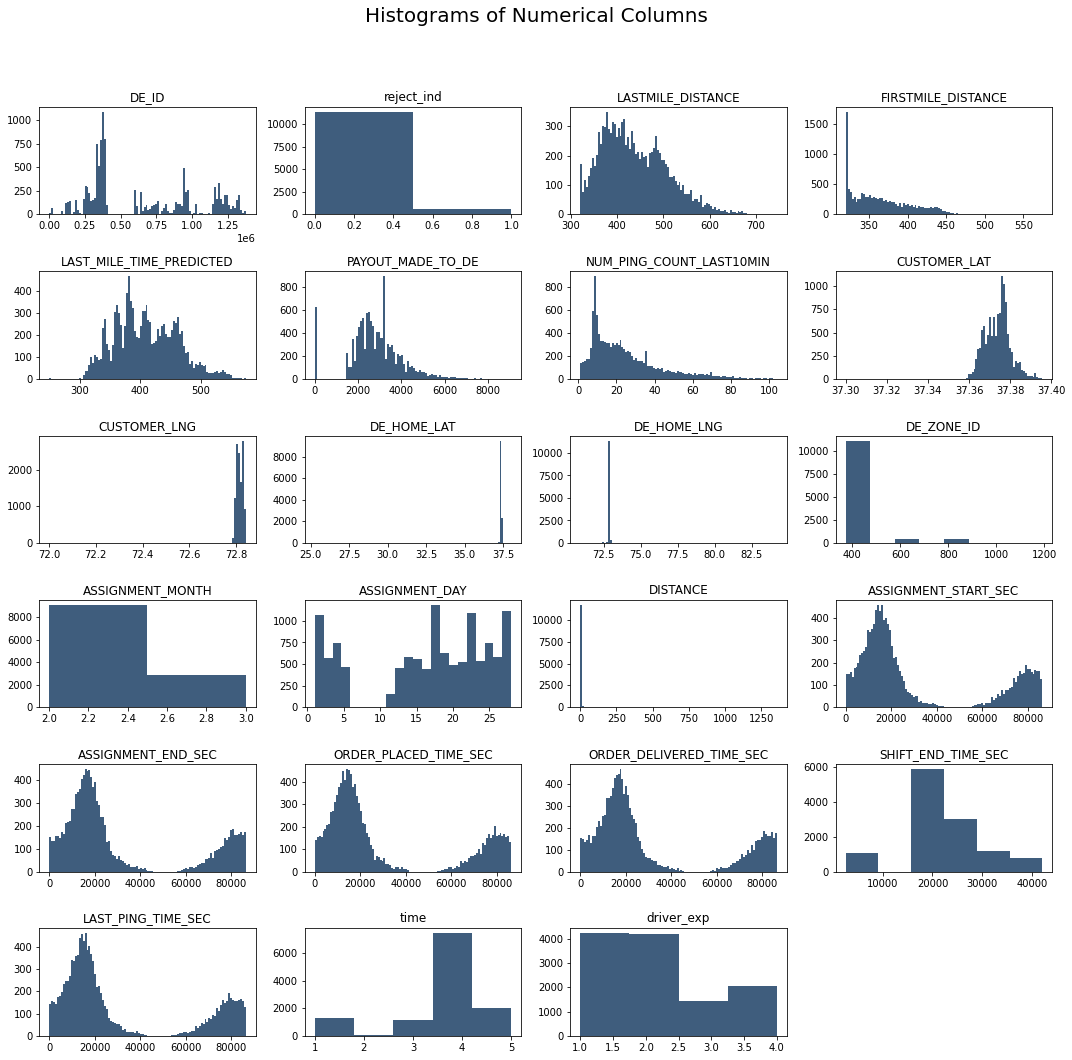

In [78]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(new_data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(new_data.columns.values[i])

    vals = np.size(new_data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(new_data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [79]:
target = new_data['reject_ind']

In [80]:
train_data = new_data.drop(['reject_ind','DE_ID', 'PAYOUT_MADE_TO_DE'], 1)

/tmp/ipykernel_767687/3156468968.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data = new_data.drop(['reject_ind','DE_ID', 'PAYOUT_MADE_TO_DE'], 1)


In [81]:
train_data

,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,NUM_PING_COUNT_LAST10MIN,CUSTOMER_LAT,CUSTOMER_LNG,DE_HOME_LAT,DE_HOME_LNG,DE_ZONE_ID,ASSIGNMENT_MONTH,ASSIGNMENT_DAY,DISTANCE,ASSIGNMENT_START_SEC,ASSIGNMENT_END_SEC,ORDER_PLACED_TIME_SEC,ORDER_DELIVERED_TIME_SEC,SHIFT_END_TIME_SEC,LAST_PING_TIME_SEC,time,driver_exp
0,320.9,320.0,314.0,63,37.377569,72.832560,37.374634,72.871986,373,2,13,3.50,11304,13106,10871,13406,20520,11254,4,3
1,370.4,414.5,378.2,52,37.368782,72.809458,37.374634,72.871986,373,2,15,5.56,12984,14071,12624,14371,20520,12979,4,3
2,408.2,320.0,397.2,9,37.374205,72.827956,37.374634,72.871986,373,3,4,3.89,17841,19399,17254,19699,20520,17793,4,3
3,389.6,342.8,382.5,16,37.369154,72.815318,37.374634,72.871986,373,2,13,5.04,760,3756,669,4056,20520,747,4,3
4,392.3,418.1,351.3,13,37.376896,72.834044,37.374634,72.871986,373,2,25,3.36,14914,16231,14208,16531,20520,14878,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,401.9,387.5,372.8,53,37.372000,72.829835,37.380234,72.913054,372,2,26,7.41,21466,23765,21108,24065,31320,21428,4,1
11931,480.5,351.2,430.7,26,37.382770,72.809860,37.380234,72.913054,372,2,26,9.12,20313,21456,18684,21756,31320,20273,4,1
11932,469.1,362.0,439.0,25,37.366603,72.815531,37.386745,72.848642,372,2,28,3.68,3376,5353,2814,5653,24120,3351,4,1
11933,610.7,344.9,499.5,62,37.376599,72.811264,37.350734,72.890238,841,2,27,7.55,81153,82517,81138,82817,20520,81123,5,1


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,target, test_size = 0.2, random_state=42)

In [83]:
X_train.shape

(9548, 20)

In [84]:
y_test

11759    0
10323    0
9195     0
357      0
4352     0
        ..
7388     0
7176     0
5721     1
267      0
6086     0
Name: reject_ind, Length: 2387, dtype: int64

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9548 entries, 3685 to 7270
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LASTMILE_DISTANCE         9548 non-null   float64
 1   FIRSTMILE_DISTANCE        9548 non-null   float64
 2   LAST_MILE_TIME_PREDICTED  9548 non-null   float64
 3   NUM_PING_COUNT_LAST10MIN  9548 non-null   int64  
 4   CUSTOMER_LAT              9548 non-null   float64
 5   CUSTOMER_LNG              9548 non-null   float64
 6   DE_HOME_LAT               9548 non-null   float64
 7   DE_HOME_LNG               9548 non-null   float64
 8   DE_ZONE_ID                9548 non-null   int64  
 9   ASSIGNMENT_MONTH          9548 non-null   int64  
 10  ASSIGNMENT_DAY            9548 non-null   int64  
 11  DISTANCE                  9548 non-null   float64
 12  ASSIGNMENT_START_SEC      9548 non-null   int64  
 13  ASSIGNMENT_END_SEC        9548 non-null   int64  
 14  ORDER

random_forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.values.ravel())
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9627147046501885

In [87]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2261    2]
 [  87   37]]


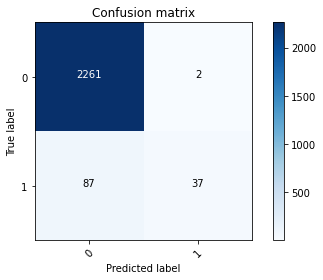

In [88]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [89]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9627 	precision:0.9487 	recall:0.2984 	F1-score:0.4540


In [90]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.962715,0.701613,0.298387,0.948718,0.453988


In [91]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [92]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [93]:
y_pred = decision_tree.predict(X_test)

In [94]:
decision_tree.score(X_test,y_test)

0.9304566401340595

Confusion matrix, without normalization
[[2166   97]
 [  69   55]]


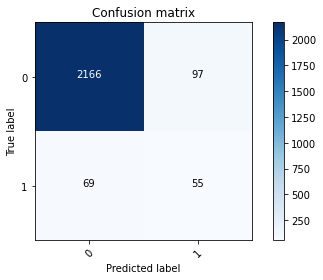

In [95]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

OverSampling

In [96]:
label_count = new_data.reject_ind.value_counts()
print('Class 0 : ', label_count[0])
print('Class 1 : ', label_count[1])

Class 0 :  11306
Class 1 :  629


In [97]:
c_class_0, c_class_1 = new_data.reject_ind.value_counts()

data_class_0 = new_data[new_data['reject_ind']==0]
data_class_1 = new_data[new_data['reject_ind']==1]

In [98]:
data_class_1_over = data_class_1.sample(c_class_0, replace=True)

In [99]:
data_test_over = pd.concat([data_class_0, data_class_1_over],axis=0)

In [100]:
data_test_over

,DE_ID,reject_ind,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,CUSTOMER_LAT,CUSTOMER_LNG,DE_HOME_LAT,...,ASSIGNMENT_DAY,DISTANCE,ASSIGNMENT_START_SEC,ASSIGNMENT_END_SEC,ORDER_PLACED_TIME_SEC,ORDER_DELIVERED_TIME_SEC,SHIFT_END_TIME_SEC,LAST_PING_TIME_SEC,time,driver_exp
0,180976,0,320.9,320.0,314.0,1810.0,63,37.377569,72.832560,37.374634,...,13,3.50,11304,13106,10871,13406,20520,11254,4,3
1,180976,0,370.4,414.5,378.2,3710.0,52,37.368782,72.809458,37.374634,...,15,5.56,12984,14071,12624,14371,20520,12979,4,3
2,180976,0,408.2,320.0,397.2,2760.0,9,37.374205,72.827956,37.374634,...,4,3.89,17841,19399,17254,19699,20520,17793,4,3
3,180976,0,389.6,342.8,382.5,2210.0,16,37.369154,72.815318,37.374634,...,13,5.04,760,3756,669,4056,20520,747,4,3
4,180976,0,392.3,418.1,351.3,2460.0,13,37.376896,72.834044,37.374634,...,25,3.36,14914,16231,14208,16531,20520,14878,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,879399,1,373.4,375.5,345.3,0.0,9,37.377882,72.825928,37.377594,...,2,2.19,6244,6424,6049,7472,24120,6202,4,1
9019,667613,1,447.8,366.2,424.2,0.0,5,37.375048,72.831054,37.366519,...,13,2.69,2080,4420,1962,7448,24120,2044,4,1
9218,395554,1,339.2,342.8,337.2,0.0,22,37.375900,72.816243,37.382548,...,5,2.88,16042,18539,15844,18839,42120,16017,4,1
9551,182504,1,469.4,429.5,445.2,0.0,23,37.376801,72.808295,37.362061,...,24,1.84,14074,14255,13154,15784,24120,13838,4,1


After Random Over-sampling
0    11306
1    11306
Name: reject_ind, dtype: int64


<AxesSubplot:title={'center':'Random Over-Sampling'}>

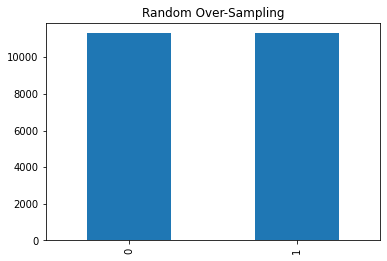

In [101]:
print("After Random Over-sampling")
print(data_test_over.reject_ind.value_counts())

data_test_over.reject_ind.value_counts().plot(kind='bar',title='Random Over-Sampling')

In [102]:
data_class_1_over.shape

(11306, 23)

In [103]:
over_target = data_test_over['reject_ind']

In [104]:
over_train_data = data_test_over.drop(['reject_ind','DE_ID', 'PAYOUT_MADE_TO_DE'], 1)

/tmp/ipykernel_767687/3177988462.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  over_train_data = data_test_over.drop(['reject_ind','DE_ID', 'PAYOUT_MADE_TO_DE'], 1)


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(over_train_data,over_target, test_size = 0.2, random_state=42)

In [106]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.values.ravel())
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9988945390227725

In [107]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2278    5]
 [   0 2240]]


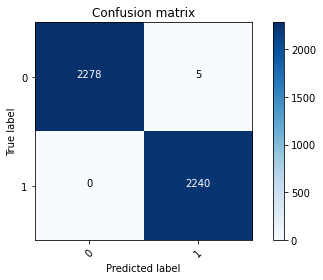

In [108]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [109]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9989 	precision:0.9978 	recall:1.0000 	F1-score:0.9989
